## Практикум по Pandas

In [4]:
import pandas as pd
import numpy as np

In [ ]:
# метод aggregate появился в версии Pandas 0.20.0
# если выдается ошибка AttributeError: 'DataFrame' object has no attribute 'aggregate', то надо обновить Pandas:
# conda update pandas
# или conda update conda

In [ ]:
# если вы запускаете notebook в другом ядре (например, питон 3.6 при основной версии питона на компьютере 2.7), то
# обновляем версию Pandas для этого ядра:
# смотрим какие ядра установлены: conda info --envs
# активируем нужное ядро: source activate python3 (в Windows команда без source)
# обновляем Pandas: conda update pandas

In [3]:
# проверяем версию Pandas
pd.__version__

'1.0.1'

In [4]:
! dir

 ’®¬ ў гбва®©бвўҐ C ­Ґ Ё¬ҐҐв ¬ҐвЄЁ.
 ‘ҐаЁ©­л© ­®¬Ґа в®¬ : 1846-7148

 ‘®¤Ґа¦Ё¬®Ґ Ї ЇЄЁ C:\Users\Vlad\YandexDisk\Љгабл\ЌҐв®«®ЈЁп - DS\01 Џ®¤Ј®в®ўЄ \0. Preparatory week\0.2 Python for DS

16.02.2020  18:06    <DIR>          .
16.02.2020  18:06    <DIR>          ..
13.02.2020  22:49    <DIR>          .ipynb_checkpoints
13.02.2020  22:49    <DIR>          Homework
16.02.2020  18:06            35я125 Pandas.ipynb
12.02.2020  23:38            61я194 train.csv
               2 д ©«®ў         96я319 Ў ©в
               4 Ї Ї®Є  111я555я801я088 Ў ©в бў®Ў®¤­®


### Создание DataFrame из листов и словарей

In [5]:
dataList = [
    { 'date': '2017-07-01', 'value': 100 },
    { 'date': '2017-07-02', 'value': 200 },
    { 'date': '2017-07-03', 'value': 300 },
    { 'date': '2017-07-04', 'value': 400 },
    { 'date': '2017-07-05', 'value': 500 },
]

In [6]:
pd.DataFrame( dataList )

,date,value
0,2017-07-01,100
1,2017-07-02,200
2,2017-07-03,300
3,2017-07-04,400
4,2017-07-05,500


In [ ]:
# то же самое, но в другом виде
# задаем столбцы

dataDict = {
    'date': [ '2017-07-01', '2017-07-02', '2017-07-03', '2017-07-04', '2017-07-05' ],
    'value': [ 100, 200, 300, 400, 500 ]
}

pd.DataFrame.from_dict( dataDict )

In [ ]:
# для сохранения порядка следования элементов можем использовать лист вместо словаря

dataDict = [
    ( 'date', [ '2017-07-01', '2017-07-02', '2017-07-03', '2017-07-04', '2017-07-05' ] ),
    ( 'value', [ 100, 200, 300, 400, 500 ] )
]

pd.DataFrame.from_items( dataDict )

In [ ]:
# лист кортежей с указанием заголовков
dataLists = [
    ('2017-07-01', 100),
    ('2017-07-02', 200),
    ('2017-07-03', 300),
    ('2017-07-04', 400),
    ('2017-07-05', 500),
]

headers = [ 'date', 'value' ]
pd.DataFrame.from_records( dataLists, columns = headers )

### Создание Series

In [7]:
# можно использовать Numpy для генерации данных
dataNP = np.random.rand( 3 )

In [8]:
dataNP

array([0.63048571, 0.41845381, 0.78252322])

In [9]:
pd.Series( dataNP, index = [ 'first', 'second', 'third' ] )

first     0.630486
second    0.418454
third     0.782523
dtype: float64

### Импорт данных для DataFrame из файлов

In [11]:
data = pd.read_csv('train.csv', delimiter=',')

In [12]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [13]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv
# указываем разделитель столбцов в файле
# заголовок у файла есть, но можно задать свои названия (удобно, если изначально они на русском)
# выводим первые 10 строк

data = pd.read_csv( 'train.csv', delimiter = ',' )
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
data.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [14]:
# основная информация о нашем DataFrame
# хорошо показывает в каких данных много пропусков
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


Столбцы SibSp и Parch (наличие родственников среди пассажиров) распознаны как целое число. Если недо это исправить, то используем dtype:

In [10]:
data = pd.read_csv( 'train.csv', delimiter = ',', dtype = {'SibSp': str, 'Parch': str} )
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    object 
 7   Parch        891 non-null    object 
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 59.2+ KB


In [15]:
# статистика DataFrame
# вывод зависит от типа данных
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html

data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Распределение значений столбца

In [16]:
type(data['Pclass'])

pandas.core.series.Series

In [17]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

### Гистограмма распределения
asdasdas

In [205]:
# рисуем в браузере
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11C67EB0>]],
      dtype=object)

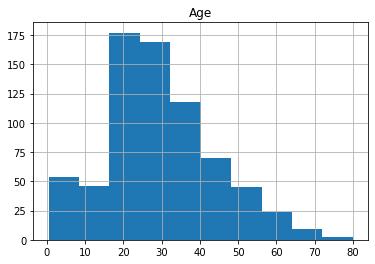

In [206]:
data.hist( column = ['Age'] )

Можно и так:

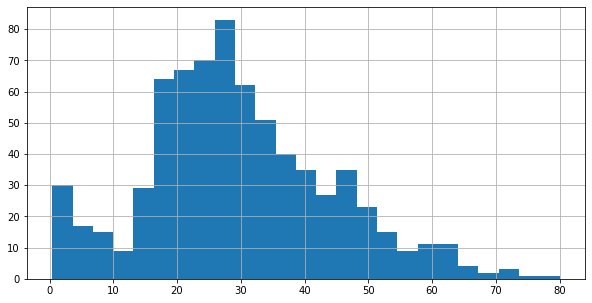

In [20]:
data['Age'].hist(bins = 25, figsize = (10, 5))

### Упражнение

Загрузите в датафрейм mountains содержимое файла Mountains.csv. Посчитайте следующие показатели:
1. Минимальную и максимальную высоту гор в этом наборе

2. В каком году было впервые покорено наибольшее количество вершин (столбец First ascent)?

3. Постройте распределение распределение First ascent по годам

In [207]:
data_mountains = pd.read_csv('Homework\Mountains.csv', delimiter = ',')
data_mountains.tail()



,Rank,Mountain,Height (m),Height (ft),Prominence (m),Range,Coordinates,Parent mountain,First ascent,Ascents bef. 2004,Failed attempts bef. 2004
113,105,Noijin Kangsang / Norin Kang,7206,23642,2160,Nagarze Himalaya,28°56′48″N 90°10′42″E﻿,Gangkar Puensum,1986,4,1.0
114,106,Langtang Ri,7205,23638,650,Langtang Himalaya,28°22′53″N 85°41′01″E﻿,Shisha Pangma,1981,4,0.0
115,107,Kangphu Kang,7204,23635,1200,Lunana Himalaya,28°09′20″N 90°03′48″E﻿,Tongshanjiabu,2002,1,0.0
116,108,Singhi Kangri,7202,23629,790,Siachen Karakoram,35°35′59″N 76°59′01″E﻿,Teram Kangri III,1976,2,0.0
117,109,Lupghar Sar,7200,23622,730,Hispar Karakoram,36°21′01″N 75°02′13″E﻿,Momhil Sar,1979,1,0.0


In [79]:
#1е упр
max_height_mountaints = data_mountains.max()['Height (m)']
min_height_mountaints = data_mountains.min()['Height (m)']
print('Минимальная высота гор: {} \nМаксимальная высота гор: {}'.format(min_height_mountaints, max_height_mountaints))
data_mountains.describe()

Минимальная высота гор: 7200 
Максимальная высота гор: 8848


,Rank,Height (m),Height (ft),Prominence (m),Failed attempts bef. 2004
count,118.000000,118.000000,118.000000,118.000000,115.000000
mean,59.500000,7578.042373,24862.364407,1671.567797,8.400000
std,34.207699,341.471211,1120.311905,1234.813419,15.782958
min,1.000000,7200.000000,23622.000000,217.000000,0.000000
25%,30.250000,7316.500000,24004.000000,712.750000,1.000000
50%,59.500000,7472.500000,24516.500000,1332.500000,3.000000
75%,88.750000,7775.500000,25509.750000,2297.250000,11.000000
max,118.000000,8848.000000,29029.000000,8848.000000,121.000000


In [82]:
#2е упр
data_mountains['First ascent'].value_counts().index[0]

'1960'

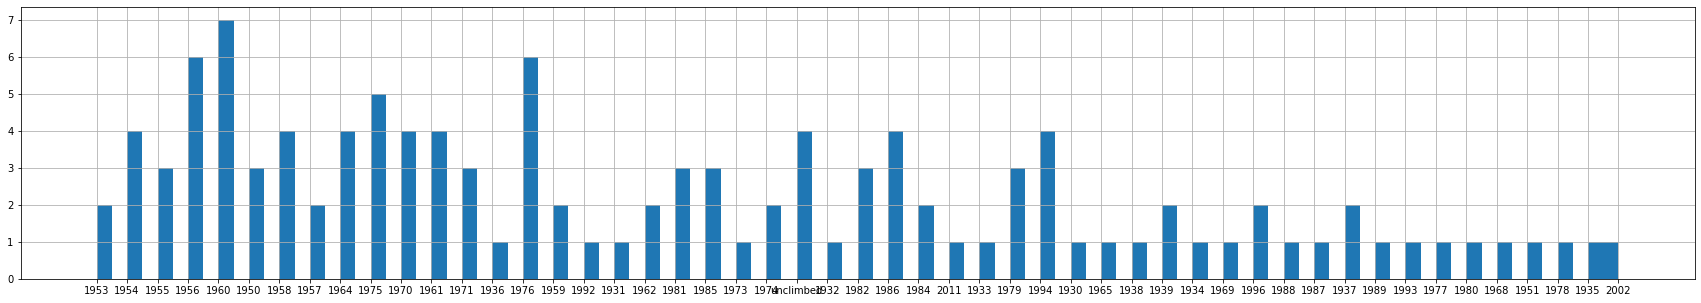

In [80]:
#3е упр
%matplotlib inline
#data_mountains.hist(column = ['First ascent'])
data_mountains['First ascent'].hist(bins=100, figsize=(30,5))

### Поэлементные действия с DataFrame

In [60]:
# зададим два DataFrame

df1 = pd.DataFrame( [ (0, 1), (2, 3), (4, 5) ], columns = [ 'value1', 'value2' ] )
df1

,value1,value2
0,0,1
1,2,3
2,4,5


In [61]:
df2 = pd.DataFrame( [ (10, 11), (12, 13), (14, 15), (17, 18) ], columns = [ 'value1', 'value3' ] )
df2

,value1,value3
0,10,11
1,12,13
2,14,15
3,17,18


In [62]:
# функция сложения
df1.add( df2 )

,value1,value2,value3
0,10.0,NaN,NaN
1,14.0,NaN,NaN
2,18.0,NaN,NaN
3,NaN,NaN,NaN


In [63]:
# для несовпадающих строк используем значение из fill_value
df1.add( df2, fill_value = 100 ).fillna(0)

,value1,value2,value3
0,10.0,101.0,111.0
1,14.0,103.0,113.0
2,18.0,105.0,115.0
3,117.0,0.0,118.0


### mul - перемножение

In [64]:
df1.mul( df2, fill_value = 0 )

,value1,value2,value3
0,0.0,0.0,0.0
1,24.0,0.0,0.0
2,56.0,0.0,0.0
3,0.0,NaN,0.0


### div - поэлементное деление DataFrame

In [65]:
df1.div( df2, fill_value = 17 )

,value1,value2,value3
0,0.000000,0.058824,1.545455
1,0.166667,0.176471,1.307692
2,0.285714,0.294118,1.133333
3,1.000000,NaN,0.944444


### Разность DataFrame

In [66]:
df1.sub( df2 )

,value1,value2,value3
0,-10.0,NaN,NaN
1,-10.0,NaN,NaN
2,-10.0,NaN,NaN
3,NaN,NaN,NaN


### Корректное копирование DataFrame

In [67]:
# зададим DataFrame

df1 = pd.DataFrame( [ (0, 1) ], columns = [ 'value1', 'value2' ] )
df1

,value1,value2
0,0,1


In [68]:
# делаем его "копию"

df2 = df1

In [69]:
# Изменяем значение ячейки в "копии"

df2['value1'][0] = 555

In [70]:
df2

,value1,value2
0,555,1


Смотрим что произошло с исходным

In [71]:
df1

,value1,value2
0,555,1


Сделаем "настоящую" копию

In [72]:
df1 = pd.DataFrame( [ (0, 1) ], columns = [ 'value1', 'value2' ] )
df1

,value1,value2
0,0,1


In [73]:
df2 = df1.copy()

In [74]:
df2['value1'][0] = 555

In [75]:
df2

,value1,value2
0,555,1


In [76]:
df1

,value1,value2
0,0,1


### Сводные таблицы

In [77]:
data = pd.read_csv( 'train.csv', delimiter = ',' )
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [209]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot.html
# index - значения столбца, которые будут в строках
# columns - значения столбца, которые образуют столбцы
# values - значения в ячейках таблицы
# aggfunc - функция, которая будет применена к значениям

# среднее значение столбца 'Age' в разбивке по Sex и Embarked
pd.pivot_table( data, index = ['Sex', 'Pclass'], columns = ['Embarked'], values = 'Age', aggfunc = lambda x: len(x.unique())


Embarked               C          Q          S
Sex    Pclass                                 
female 1       36.052632  33.000000  32.704545
       2       19.142857  30.000000  29.719697
       3       14.062500  22.850000  23.223684
male   1       40.111111  44.000000  41.897188
       2       25.937500  57.000000  30.875889
       3       25.016800  28.142857  26.574766

In [214]:
?pd.pivot_table

### Apply - применить функцию в столбцу или строке

In [136]:
data = pd.read_csv( 'train.csv', delimiter = ',' )
data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [84]:
def ageGroup( row ):
    """
    Простая функция отнесения возраста к группе
    """
    
    # проверяем, что значение возраста не равно NaN
    if not pd.isnull( row['Age'] ):
        if row['Age'] <= 18:
            return 'Child'

        if row['Age'] >= 65:
            return 'Retiree'

        return 'Young'
    
    # если значение возраста NaN, то возвращаем Undef
    return 'Undef'

In [137]:
# применим функцию ageGroup к DataFrame и выведем результат в отдельный столбец ageGroup

data['ageGroup'] = data.apply( ageGroup, axis = 1 )
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ageGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Young
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Undef
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Young
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Young
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Child


In [139]:
data['ageGroup'].value_counts()

Young      564
Undef      177
Child      139
Retiree     11
Name: ageGroup, dtype: int64

In [141]:
data[data['ageGroup'].isin(['Young', 'undef'])].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ageGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Young
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Young
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Young
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,Young
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,Young
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,Young


### Applymap - применяем функцию к каждой ячейке отдельно

In [86]:
# например, устанавливаем формат отображения

df = pd.DataFrame( np.random.randn( 10, 3 ), columns = ['first', 'second', 'third'] )
df

,first,second,third
0,-1.654327,-0.824899,0.608741
1,-0.064194,1.140683,0.811649
2,-0.840612,0.730379,-1.148644
3,0.547873,0.282605,0.271425
4,-0.113030,-1.048093,-0.612888
5,0.431935,0.801211,-0.284452
6,0.830201,0.909502,-0.626323
7,-0.216632,-0.975645,-1.619599
8,2.092794,-0.746333,0.654914
9,1.098458,0.613505,-0.192552


In [87]:
df.apply( lambda x: x**2 )

,first,second,third
0,2.736797,0.680458,0.370566
1,0.004121,1.301157,0.658773
2,0.706628,0.533453,1.319383
3,0.300164,0.079866,0.073672
4,0.012776,1.098500,0.375632
5,0.186567,0.641939,0.080913
6,0.689233,0.827193,0.392280
7,0.046929,0.951882,2.623100
8,4.379787,0.557013,0.428912
9,1.206610,0.376389,0.037076


## Упражнение

Классифицируйте высоту гор и посчитайте распределение количества вершин по этой классификации:
* высота до 7500 метров - High
* до 8000 метров - Very high
* более 8000 метров - Extremely high

In [92]:
data_mountains.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rank                       118 non-null    int64  
 1   Mountain                   118 non-null    object 
 2   Height (m)                 118 non-null    int64  
 3   Height (ft)                118 non-null    int64  
 4   Prominence (m)             118 non-null    int64  
 5   Range                      118 non-null    object 
 6   Coordinates                118 non-null    object 
 7   Parent mountain            117 non-null    object 
 8   First ascent               118 non-null    object 
 9   Ascents bef. 2004          116 non-null    object 
 10  Failed attempts bef. 2004  115 non-null    float64
dtypes: float64(1), int64(4), object(6)
memory usage: 7.4+ KB


In [129]:
def heightGroup( row ):
    # проверяем, что значение высоты не равно NaN
    if not pd.isnull(row['Height (m)']):
        if row['Height (m)'] < 7500:
            return 'High'

        if 7500 <= row['Height (m)'] <= 8000:
            return 'Very high'

        if row['Height (m)'] > 8000:
            return 'Extremely high'

        return 'Just high'
    
    # если значение возраста NaN, то возвращаем Undef
    return 'Undef'

In [130]:
data_mountains['heightGroup'] = data_mountains.apply(heightGroup, axis = 1 )
data_mountains['heightGroup'].value_counts()


High              64
Very high         40
Extremely high    14
Name: heightGroup, dtype: int64

### Сохранение DataFrame

In [ ]:
data.head()

In [ ]:
data.to_csv

In [142]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html
# разделитель sep по умолчанию запятая
# na_rep - что ставим на место пустых ячеек
# columns - какие столбцы хотим записать
# index - включать ли номер строки

data.to_csv( 'train_modified.csv', sep = ';', na_rep = '0', columns = ['Survived', 'ageGroup'], index = False )

In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_json.html
# при сохранении в JSON может быть несколько вариантов группировки данных

# orient = index - строки имеют вид
# {"0":{"PassengerId":1,"Survived":0,"Pclass":3,"Name":"Braund, Mr. Owen Harris","Sex":"male","Age":22.0,"SibSp":1,"Parch":0,"Ticket":"A\/5 21171","Fare":7.25,"Cabin":null,"Embarked":"S","ageGroup":"Young"}

data.to_json( 'train_json_index.json', orient = 'index' )

In [ ]:
# другие варианты

data.to_json( 'train_json_columns.json', orient = 'columns' )
data.to_json( 'train_json_records.json', orient = 'records' )

In [144]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_excel.html
# сохранение в Excel

data.to_excel( 'train_modified.xlsx', sheet_name = 'data' )

### Типовые действия с DF

In [164]:
data = pd.read_csv( 'train.csv', delimiter = ',' )
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [145]:
# выбрать все строки и подмножество столбцов

dataSelected = data.loc[:3, ['Name', 'Age', 'Cabin']]
dataSelected.head()

,Name,Age,Cabin
0,"Braund, Mr. Owen Harris",22.0,NaN
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,C85
2,"Heikkinen, Miss. Laina",26.0,NaN
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,C123


In [146]:
# добавляем к фильтру строки
# например, с третьей до последней

dataSelected = data.loc[2:15, ['Name', 'Age', 'Cabin']]
dataSelected.head()

,Name,Age,Cabin
2,"Heikkinen, Miss. Laina",26.0,NaN
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,C123
4,"Allen, Mr. William Henry",35.0,NaN
5,"Moran, Mr. James",NaN,NaN
6,"McCarthy, Mr. Timothy J",54.0,E46


### Добавить столбцы

In [147]:
# посчитаем количество слов в столбце Name
# сначала разбиваем на слова

data['nameLength'] = data['Name'].str.split(' ')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ageGroup,nameLength
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young,"[Braund,, Mr., Owen, Harris]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Young,"[Cumings,, Mrs., John, Bradley, (Florence, Bri..."
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young,"[Heikkinen,, Miss., Laina]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young,"[Futrelle,, Mrs., Jacques, Heath, (Lily, May, ..."
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young,"[Allen,, Mr., William, Henry]"


In [148]:
# добавляем подсчет количества слов

data['nameLength'] = data['Name'].str.split(' ').str.len()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ageGroup,nameLength
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Young,7
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young,7
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young,4


In [149]:
# удаляем наши вычисления

del data['nameLength']
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ageGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Young
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young


In [151]:
# переименование столбца
# параметр inplace указывает, что надо подставить новое значение в самом DataFrame data

data.rename( columns = { 'Name': 'FIO' }, inplace=True )
data.head()

,PassengerId,Survived,Pclass,FIO,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ageGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Young
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young


In [152]:
data.FIO

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: FIO, Length: 891, dtype: object

In [154]:
# можно заменить названия столбцов
# например, иногда русские названия в исходных данных доставляют трудности

data.columns = [ 'ID', 'Survived', 'Class', 'FIO', 'Gender', 'Age', 'SibSp', 'Parch', 'Ticker number', 'Fare', 'Cabin', 'Emnarked', 'ages']
data.head()

,ID,Survived,Class,FIO,Gender,Age,SibSp,Parch,Ticker number,Fare,Cabin,Emnarked,ages
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Young
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young


### Действия со строками

In [ ]:
data = pd.read_csv( 'train.csv', delimiter = ',' )
data.head()

In [155]:
# выбрать нужные строки
# например, со второй по пятую

data.loc[ 0:1 ]

,ID,Survived,Class,FIO,Gender,Age,SibSp,Parch,Ticker number,Fare,Cabin,Emnarked,ages
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Young


In [156]:
# выбор с набором значений
# строки с номерами 1, 2, 3 и 44

dataNew = data.iloc[ [1, 2, 3, 44] ]

In [157]:
dataNew

,ID,Survived,Class,FIO,Gender,Age,SibSp,Parch,Ticker number,Fare,Cabin,Emnarked,ages
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Young
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young
44,45,1,3,"Devaney, Miss. Margaret Delia",female,19.0,0,0,330958,7.8792,NaN,Q,Young


In [159]:
# индексы теперь идут не по порядку
# исправляем

dataNew.reset_index(inplace=True)

In [160]:
dataNew

,index,ID,Survived,Class,FIO,Gender,Age,SibSp,Parch,Ticker number,Fare,Cabin,Emnarked,ages
0,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Young
1,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young
2,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young
3,44,45,1,3,"Devaney, Miss. Margaret Delia",female,19.0,0,0,330958,7.8792,NaN,Q,Young


In [161]:
del dataNew['index']

In [162]:
dataNew

,ID,Survived,Class,FIO,Gender,Age,SibSp,Parch,Ticker number,Fare,Cabin,Emnarked,ages
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Young
1,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young
3,45,1,3,"Devaney, Miss. Margaret Delia",female,19.0,0,0,330958,7.8792,NaN,Q,Young


In [165]:
# можно задать маску, по которой будут фильтроваться строки
# например, ID пассажира делится на 2

mask = ( data.PassengerId % 2 == 0 )

In [166]:
mask[:5]

0    False
1     True
2    False
3     True
4    False
Name: PassengerId, dtype: bool

In [167]:
data.loc[ mask ].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [168]:
data[ data.PassengerId % 2 == 0 ].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Работа с пустыми значениями

In [169]:
data = pd.read_csv( 'train.csv', delimiter = ',' )
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [170]:
# В столбце Age довольно много пустых значений
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [171]:
# посмотрим что это за строки

data.loc[ pd.isnull( data['Age'] ) ].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [173]:
# если надо исключить условие, то ставим тильду:

data.loc[ ~pd.isnull( data['Age'] ) ].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


In [174]:
# заменим пустые значения столбца Age на медиану

medianAge = data['Age'].median()
medianAge

28.0

In [175]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html

data['Age'].fillna( medianAge, inplace = True )

In [176]:
# итак, значение для строки с индексом 5 (было NaN) заменено на среднее

data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Сортировка

In [177]:
# сортировка по индексу
data.sort_index( ascending = False ).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.45,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S


In [178]:
# сортировка по значениям
data.sort_values( by = 'Age', ascending = False ).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q


In [179]:
# сортировка по значениям нескольких столбцов
data.sort_values( by = ['Sex', 'Age'], ascending = [True, False] ).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,C
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


### Агрегация и группировка

In [180]:
data = pd.read_csv( 'train.csv', delimiter = ',' )
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [181]:
# число непустых строк в DataFrame
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html

data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [182]:
# для отдельного столбца

data['Age'].count()

714

In [183]:
# сумма
data.sum()

PassengerId                                               397386
Survived                                                     342
Pclass                                                      2057
Name           Braund, Mr. Owen HarrisCumings, Mrs. John Brad...
Sex            malefemalefemalefemalemalemalemalemalefemalefe...
Age                                                      21205.2
SibSp                                                        466
Parch                                                        340
Ticket         A/5 21171PC 17599STON/O2. 31012821138033734503...
Fare                                                     28693.9
dtype: object

In [184]:
# среднее значение
data.mean()

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [185]:
# комбинация функций
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.aggregate.html

data.aggregate( ['sum', 'mean'] )

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
sum,397386.0,342.000000,2057.000000,"Braund, Mr. Owen HarrisCumings, Mrs. John Brad...",malefemalefemalefemalemalemalemalemalefemalefe...,21205.170000,466.000000,340.000000,A/5 21171PC 17599STON/O2. 31012821138033734503...,28693.949300
mean,446.0,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208


In [186]:
# агрегация по столбцам (agg - синоним aggregate)

data.agg( { 'Age': ['mean'], 'Survived': ['mean', 'sum'] } )

,Age,Survived
mean,29.699118,0.383838
sum,NaN,342.000000


In [187]:
# группировка по столбцу с вычислением среднего

data.groupby( 'Sex' ).mean().reset_index()

,Sex,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
1,male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [189]:
# группировка по нескольким столбцам одновременно

data.groupby( ['Sex', 'Age'] ).mean().reset_index()

,Sex,Age,PassengerId,Survived,Pclass,SibSp,Parch,Fare
0,female,0.75,557.500000,1.000000,3.0,2.0,1.0,19.258300
1,female,1.00,277.500000,1.000000,3.0,0.5,1.5,13.437500
2,female,2.00,379.666667,0.333333,2.5,1.5,1.5,43.245833
3,female,3.00,209.500000,0.500000,2.5,2.0,1.5,31.327100
4,female,4.00,451.600000,1.000000,2.6,0.8,1.2,22.828340
...,...,...,...,...,...,...,...,...
140,male,70.00,709.500000,0.000000,1.5,0.5,0.5,40.750000
141,male,70.50,117.000000,0.000000,3.0,0.0,0.0,7.750000
142,male,71.00,295.500000,0.000000,1.0,0.0,0.0,42.079200
143,male,74.00,852.000000,0.000000,3.0,0.0,0.0,7.775000


### Объединение DataFrame

Merge - аналог JOIN в SQL

In [190]:
# заведем два DataFrame

df1 = pd.DataFrame( {
    'key1': ['one', 'two', 'three', 'only1'],
    'value': [1, 2, 3, 4]
} )

In [191]:
df1

,key1,value
0,one,1
1,two,2
2,three,3
3,only1,4


In [192]:
df2 = pd.DataFrame( {
    'key2': ['one', 'two', 'three', 'only2'],
    'value': [11, 12, 13, 14]
} )

In [193]:
df2

,key2,value
0,one,11
1,two,12
2,three,13
3,only2,14


In [194]:
# сохраняем все значения ключей, которые есть в df1
# если нужно несколько столбцов, то пишем left_on = ['key1', ...] и right_on = ['key2', ...]

df1.merge( df2, how = 'left', left_on = 'key1', right_on = 'key2' )

,key1,value_x,key2,value_y
0,one,1,one,11.0
1,two,2,two,12.0
2,three,3,three,13.0
3,only1,4,NaN,NaN


In [195]:
# сохраняем все значения ключей, которые есть в df2

df1.merge( df2, how = 'right', left_on = 'key1', right_on = 'key2' )

,key1,value_x,key2,value_y
0,one,1.0,one,11
1,two,2.0,two,12
2,three,3.0,three,13
3,NaN,NaN,only2,14


In [196]:
# сохраняем все значения ключей (объединение)

df1.merge( df2, how = 'outer', left_on = 'key1', right_on = 'key2' )

,key1,value_x,key2,value_y
0,one,1.0,one,11.0
1,two,2.0,two,12.0
2,three,3.0,three,13.0
3,only1,4.0,NaN,NaN
4,NaN,NaN,only2,14.0


In [197]:
# сохраняем только общие значения ключей

df1.merge( df2, how = 'inner', left_on = 'key1', right_on = 'key2' )

,key1,value_x,key2,value_y
0,one,1,one,11
1,two,2,two,12
2,three,3,three,13


Concat - совмещение DataFrame

In [198]:
# объединение DataFrame путем обычного "склеивания"
pd.concat( [df1, df2] )

,key1,value,key2
0,one,1,NaN
1,two,2,NaN
2,three,3,NaN
3,only1,4,NaN
0,NaN,11,one
1,NaN,12,two
2,NaN,13,three
3,NaN,14,only2


In [199]:
# горизонтальное объединение
pd.concat( [df1, df2], axis = 1 )

,key1,value,key2,value
0,one,1,one,11
1,two,2,two,12
2,three,3,three,13
3,only1,4,only2,14


Join - объединение по индексу

In [200]:
df1 = pd.DataFrame( {
    'key1': ['one', 'two', 'three', 'only1'],
    'value': [1, 2, 3, 4]
    },
    index = ['0', '1', '2', '3'])

In [201]:
df1

,key1,value
0,one,1
1,two,2
2,three,3
3,only1,4


In [202]:
df2 = pd.DataFrame( {
    'key2': ['one', 'two', 'three', 'only2'],
    'value': [11, 12, 13, 14]
    },
    index = ['2', '3', '4', '5'])

In [203]:
df2

,key2,value
2,one,11
3,two,12
4,three,13
5,only2,14


In [204]:
# для join надо указать lsuffix и rsuffix

df1.join( df2, how = 'left', lsuffix = '_df1', rsuffix = '_df2' )

,key1,value_df1,key2,value_df2
0,one,1,NaN,NaN
1,two,2,NaN,NaN
2,three,3,one,11.0
3,only1,4,two,12.0
